# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:  Estefania Zapata Valderrama

Identificación: 1006373242

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [53]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial,pi,sqrt
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.


In [5]:
def steffensen(f,x0,tol= 1e-10, maxiter= 100): #defino la funcion y sus valores de entrada
  '''
  La funcion steffensen recibe
  f = funcion a la cual queremos encontrarle la raiz
  x0 = un punto cercano a la raiz para empezar a evaluar
  tol = un valor de una tolerancia para evaluar la proximidad a la raiz
  maxiter = un numero maximo de iteraciones

  la funcion me retorna
  x1 = el valor x(n+1) para el cual se cumplio la tolerancia y esta es la aproximacion a la raiz de f(x) = 0
  n = el numero de iteraciones que se realizaron para alcanzar la toleracion
  '''
  n = 0 #inicio el contador de iteraciones en 0
  while True: #inicio un ciclo para hacer las iteraciones
    y0 = x0 + f(x0) #defino y0
    if f(y0) == f(x0): #utilizo un condicional para evaluar que estos valores no sean igual
      raise ValueError('f(y0) debe ser diferente a f(x0) para evitar division por cero') #si los valores son iguales marco un error
    x1 = x0 - ((f(x0)**2)/f(y0)-f(x0)) #defino el termino n+1
    n += 1 #sumo 1 al contador de iteraciones
    if abs(x1-x0)< tol: #evaluo la condicion para definir mi resultado
      return x1,n #si se cumple la condicion para la tolerancia, devuelvo x1 y n
    else: x0 = x1 #si no se cumple la condicion, cambio el termino x0 por el siguiente
  raise RuntimeError(f'No se ha encontrado la raiz en {maxiter} iteraciones') #error si no se encuentra el valor en un maximo de iteraciones


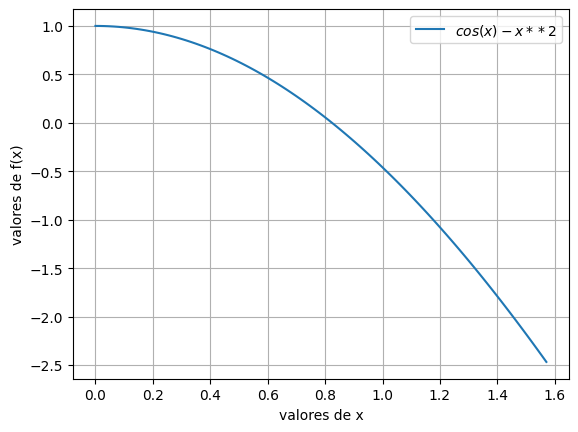

In [18]:
fx = lambda x: np.cos(x)-x**2
x = np.linspace(0, pi/2,100)
y = fx(x)


plt.plot(x,y,label='$cos(x)-x**2$')
plt.xlabel('valores de x')
plt.ylabel('valores de f(x)')
plt.grid()
plt.legend()
plt.show()

In [20]:
#df = pd.DataFrame({'x': x,'f(x)': y})

#df['f(x)'] == 0

In [30]:
raiz_aprox , n_terminos = steffensen(fx,1.6,tol=1e3,maxiter=100)
print(f'la raiz usando la funcion steffensen es:{raiz_aprox}')

raiz_biseccion = bisect(fx,0,1.5)
print(f'la raiz usando el metodo de biseccion es:{raiz_biseccion}')
raiz_secante = newton(fx, x0=1.5, x1=1.3)
print(f'la raiz usando el metodo de secante es: {raiz_secante}')

la raiz usando la funcion steffensen es:14.632024053127147
la raiz usando el metodo de biseccion es:0.8241323123033908
la raiz usando el metodo de secante es: 0.8241323123026507


#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





In [12]:
def doblefactorial(n):
  if n <= 0:
    return 1
  else:
    resultado = 1
    for i in range(1, n+1,2):
      resultado *= i
    return resultado

In [40]:
def coeficiente_cn(n): #recibe el doble factorial y el numero de terminos
  cn = (doblefactorial(n)/((2**n)(factorial(n))))**2
  return cn


In [42]:
def sumatoria(n,theta):
  for i in range(n+1):
    suma = coeficiente_cn(n)*(np.sin(theta/2)**2*i)
  return suma



In [57]:
def periodo(n,l,thetha):
  T= 2*pi*(sqrt(l/9.8))(1+sumatoria(n,theta))
  return T

In [58]:
T_90 = periodo(3,1.2,90)

NameError: name 'theta' is not defined